In [24]:
import copy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

np.set_printoptions(precision=4, suppress=True)
pd.set_option('display.float_format', lambda x: '%.4f' % x)

In [2]:
df = pd.read_csv('../data/NumericalLoanData.csv', low_memory=False)
df

,Default,Age,AppliedAmount,DebtToIncome,FreeCash,IncomeTotal,LiabilitiesTotal,LoanDuration,NewCreditCustomer,NrOfDependants,WOECountry,WOEEducation,WOEEmploymentDurationCurrentEmployer,WOEEmploymentStatus,WOEGender,WOEHomeOwnershipType,WOEMaritalStatus,WOEOccupationArea,WOEUseOfLoan,WOEWorkExperience
0,1,53,2125.0000,26.2900,10.9200,354.0000,485.0900,60,0,0.0000,-0.4964,-0.2142,-0.0269,0.4649,-0.0306,-0.2004,-0.1084,0.1105,-0.0249,0.0350
1,1,50,3000.0000,30.5800,78.8000,900.0000,736.4500,60,0,0.0000,-0.4964,-0.2081,-0.0269,-0.0732,-0.0306,-0.2004,-0.1084,0.0489,-0.0249,0.0350
2,1,44,10630.0000,26.7100,349.4300,1200.0000,905.0000,60,1,1.0000,-0.4964,-0.2142,0.0146,-0.0732,0.0242,0.1064,0.1355,-0.0772,-0.0249,0.0350
3,1,42,1500.0000,7.3600,449.4700,863.0000,350.0000,60,1,0.0000,0.9821,0.3224,0.0256,-0.0171,0.0242,0.2052,-0.1084,0.1105,-0.0249,-0.0213
4,1,34,1595.0000,36.0400,95.8100,697.0000,940.0000,48,1,2.0000,0.9821,-0.2142,0.0146,0.4649,-0.0306,0.1064,0.1355,0.1105,0.0271,-0.0213
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34740,1,38,2000.0000,9.4000,1393.8900,2300.0000,830.0000,60,1,0.0000,0.7346,0.5210,0.0256,-0.0171,-0.0306,0.1064,-0.1084,0.1105,0.0271,-0.0213
34741,0,37,7440.0000,69.7700,5.5100,2172.0000,2488.0900,60,0,0.0000,0.7346,-0.2142,-0.0269,-0.0171,0.0242,0.1064,0.1355,-0.0772,-0.0249,0.0350
34742,0,37,1595.0000,30.1300,67.9200,1550.0000,1877.0000,60,0,0.0000,0.9821,0.5210,-0.0269,-0.0171,0.0242,0.1064,0.1355,-0.0772,0.0271,0.0350
34743,0,58,3000.0000,25.3500,11.2900,350.0000,359.0000,60,1,0.0000,-0.4964,0.5210,0.0146,-0.0171,-0.0306,-0.2004,-0.1084,0.1105,0.0271,0.0350


In [3]:
X = copy.deepcopy(df)
y = X.pop('Default')

In [25]:
scale = StandardScaler()
pca = PCA(n_components=2, whiten=True)
X = scale.fit_transform(X)
x = pca.fit_transform(X)

(-4.0, 5.0)

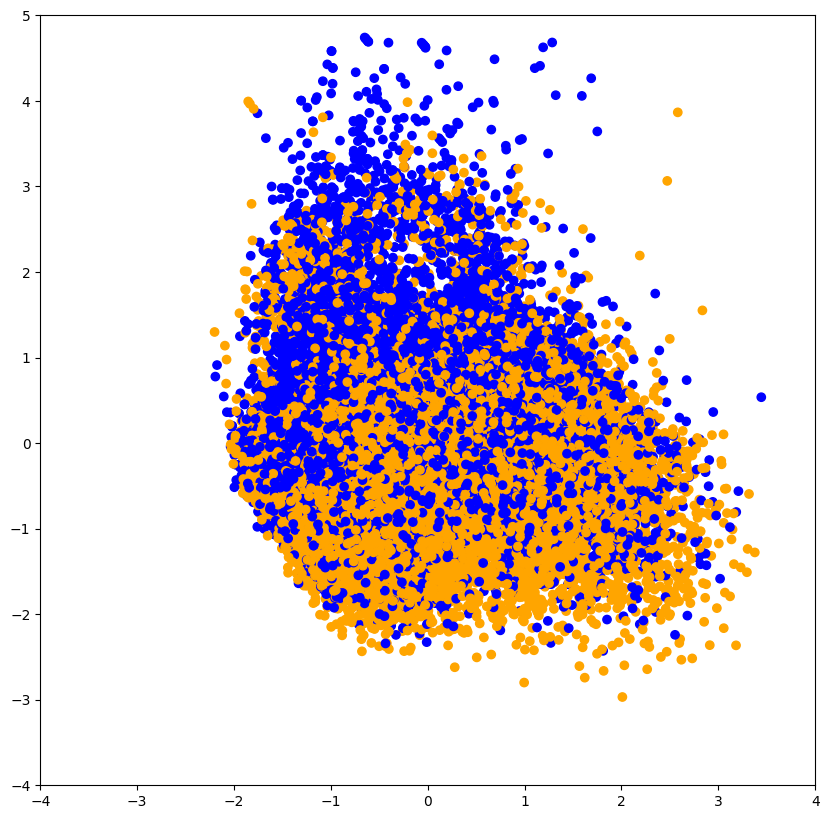

In [43]:
colors = ['blue', 'orange']
cs = [colors[g] for g in y]
plt.figure(figsize=(10, 10))
plt.scatter(x[:, 0], x[:, 1], c=cs, alpha=1)
plt.xlim(-4, 4)
plt.ylim(-4, 5)